<a href="https://colab.research.google.com/github/BrianKipngeno/Breast-cancer-detection-with-Neural-Networks/blob/main/Breast_cancer_detection_with_neural_networks_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using the breast cancer dataset, we can classify the cancer diagnosis as either malignant or benign.

Dataset link: http://bit.ly/breast_cancer_dataset.

### Step 1: Data preparation

In [4]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Step 1: Data Preparation
df2 = pd.read_csv("http://bit.ly/breast_cancer_dataset")

df2.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Lets check the unique classes in the diagnosis
print(df2.diagnosis.unique())

['M' 'B']


In [7]:
# Let's assign specific numbers to the species
df2['diagnosis'] = df2['diagnosis'].map({'M':0,'B':1})

In [8]:
# We'll drop the unecesssary column Id and unnamed
df2.drop(['id', 'Unnamed: 32'],axis=1,inplace=True)

In [9]:
# Checking the new data
df2.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Step 2: Building the model

In [10]:
# Step 2: Building model
# We’re going to predict the diagniosis after looking at the other features
# So, the input data will be all the other variables
# Output would be just the diagnosis
X = df2.drop(columns=['diagnosis']).values

y = df2['diagnosis'].values

In [11]:
# Let's import train_test_split and proceed to split our dataset.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [12]:
# Let's scale our data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [13]:
# Converting from numpy arrays to torch tensor
X_train = torch.FloatTensor(X_train)

X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)

y_test = torch.LongTensor(y_test)

In [14]:
# Let's now create our model
from torch import nn, optim

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = Net(input_size=30, hidden_size=60, num_classes=2)

### Step 3, 4, 5

In [15]:
# Let's train our model
# We use the nn.CrossEntropyLoss() function as the loss function.
# We also use the SGD optimizer with a learning rate of 0.001 and a momentum of 0.9.
# Let's define the loss using criterionn and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Training the model
num_epochs = 100

loss_vals = []

for epoch in range(num_epochs):
    outputs = model(X_train)

    # Let's clear out the gradients from the last step loss.backward()
    optimizer.zero_grad()

    # Step 3: Forward propagation
    outputs = model(X_train)

    # Step 4: Loss computation
    loss = criterion(outputs, y_train)

    # Step 5: Backward propagation to calculate gradients and optimization
    loss.backward()

    loss_vals.append(loss.detach().numpy().item())

    # Updating the weights
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.4277
Epoch [20/100], Loss: 0.2420
Epoch [30/100], Loss: 0.1730
Epoch [40/100], Loss: 0.1411
Epoch [50/100], Loss: 0.1230
Epoch [60/100], Loss: 0.1109
Epoch [70/100], Loss: 0.1022
Epoch [80/100], Loss: 0.0955
Epoch [90/100], Loss: 0.0902
Epoch [100/100], Loss: 0.0857


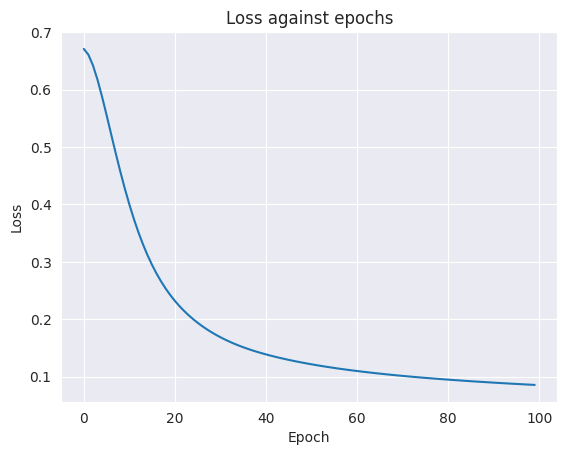

In [16]:
# Let's plot our loss with seaborn
import seaborn as sns

sns.set_style('darkgrid')

indexes = list(range(len(loss_vals)))

sns.lineplot(x = indexes, y = loss_vals)

plt.xlabel('Epoch')

plt.ylabel('Loss')

plt.title('Loss against epochs')

plt.show()

In [17]:
# Finally, we'll calculate the accuracy of our model.
# Let's import the necessary libraries for this task.
from sklearn.metrics import accuracy_score

with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs.data, 1)

    accuracy = accuracy_score(y_test, predicted)

    print(f'Accuracy: {100 * accuracy:.2f}%')

Accuracy: 98.25%
